not paired groups

In [1]:
import numpy as np

v=[80, 30 ,75, 90, 57, 72]
nv=[61, 98, 92, 55, 47, 99]

diff = np.average(nv)-np.average(v)

all = v+nv

x= np.empty(1000)
for i in range(0,1000):
    y1=np.random.choice(all, size=np.size(v))
    y2=np.random.choice(all, size=np.size(nv))

    x[i]=np.average(y2)-np.average(y1) # must match the diff (nv-v)

np.sum(x>=diff)/1000

np.float64(0.226)

The term **"קבוצות מזווגות"** (paired groups) refers to groups where each element in one group has a direct counterpart in the other group. This is common in scenarios like before-and-after measurements, where each individual or subject is measured twice (once for each condition). In contrast, **"קבוצות לא מזווגות"** (unpaired groups) are independent, meaning there is no direct relationship between the elements of the two groups.

### Explanation of the Current Code
The current code assumes **unpaired groups** (`v` and `nv`). It treats the two groups as independent and pools their data into a single list (`all`) for the permutation test. Random samples are drawn independently for each group (`y1` and `y2`) to simulate the null hypothesis.

### What Changes Are Needed for Paired Groups?
If the groups were **paired**, the analysis would need to account for the pairing. Instead of comparing the averages of the two groups independently, you would calculate the difference for each pair and analyze the distribution of these differences. Here's how the code would change:

1. **Calculate Pairwise Differences**:
   Instead of pooling the data, compute the difference for each pair: `pairwise_diff = [nv[i] - v[i] for i in range(len(v))]`.

2. **Permutation Test on Pairwise Differences**:
   Shuffle the signs of the pairwise differences (instead of shuffling the data itself) to simulate the null hypothesis.

### Modified Code for Paired Groups
```python
import numpy as np

v = [80, 30, 75, 90, 57, 72]
nv = [61, 98, 92, 55, 47, 99]

# Calculate pairwise differences
pairwise_diff = [nv[i] - v[i] for i in range(len(v))]
observed_diff = np.average(pairwise_diff)

# Permutation test: shuffle signs of differences
x = np.empty(1000)
for i in range(1000):
    shuffled_diff = [d * np.random.choice([-1, 1]) for d in pairwise_diff]
    x[i] = np.average(shuffled_diff)

# Calculate p-value
p_value = np.sum(x >= observed_diff) / 1000
print("P-value:", p_value)
```

### Key Differences in the Paired Approach
1. **Pairwise Differences**: The analysis focuses on the differences between paired elements, rather than treating the groups as independent.
2. **Shuffling Signs**: Instead of shuffling the data, the signs of the differences are shuffled to simulate the null hypothesis.
3. **Preservation of Pairing**: The pairing structure is maintained throughout the analysis.

This approach is appropriate for paired data because it accounts for the dependency between the two groups.

In [2]:
import numpy as np

v = [80, 30, 75, 90, 57, 72]
nv = [61, 98, 92, 55, 47, 99]

# Calculate pairwise differences
pairwise_diff = [nv[i] - v[i] for i in range(len(v))]
observed_diff = np.average(pairwise_diff)

# Permutation test: shuffle signs of differences
x = np.empty(1000)
for i in range(1000):
    shuffled_diff = [d * np.random.choice([-1, 1]) for d in pairwise_diff]
    x[i] = np.average(shuffled_diff)

# Calculate p-value
p_value = np.sum(x >= observed_diff) / 1000
print("P-value:", p_value)

P-value: 0.355


The slide from your lecture describes a general approach for **paired hypothesis testing** using bootstrapping. Here's how it relates to the code and what adjustments are needed to align the code with the lecture's steps:

### Lecture Steps for Paired Hypothesis Testing:
1. **Calculate the Differences**:
   - Compute the difference `d = x - y` for each pair of values in the two groups.
   - Then calculate the mean of these differences (`mean_diff`).

2. **Bootstrap the Differences**:
   - Perform 1,000 iterations (or more) of bootstrapping by resampling the differences with replacement.
   - For each iteration, calculate the mean of the resampled differences to create a bootstrap distribution of means.

3. **Compare the Observed Mean to the Bootstrap Distribution**:
   - Determine where the actual mean difference (`mean_diff`) lies within the bootstrap distribution.
   - This is used to calculate the p-value, which quantifies the likelihood of observing the actual mean difference under the null hypothesis.

---

### How to Modify the Code to Match the Lecture Steps:
The current code already calculates pairwise differences and uses a permutation test by shuffling signs. To follow the lecture's approach, you would instead **bootstrap the differences** by resampling them with replacement. Here's the modified code:

```python
import numpy as np

# Paired data
v = [80, 30, 75, 90, 57, 72]
nv = [61, 98, 92, 55, 47, 99]

# Step 1: Calculate the differences and the observed mean difference
pairwise_diff = [nv[i] - v[i] for i in range(len(v))]
observed_mean_diff = np.mean(pairwise_diff)

# Step 2: Bootstrap the differences
bootstrap_means = np.empty(1000)
for i in range(1000):
    # Resample the differences with replacement
    resampled_diff = np.random.choice(pairwise_diff, size=len(pairwise_diff), replace=True)
    # Calculate the mean of the resampled differences
    bootstrap_means[i] = np.mean(resampled_diff)

# Step 3: Calculate the p-value
# Find the proportion of bootstrap means greater than or equal to the observed mean difference
p_value = np.sum(bootstrap_means >= observed_mean_diff) / 1000

print("Observed Mean Difference:", observed_mean_diff)
print("P-value:", p_value)
```

---

### Key Differences Between the Lecture Approach and the Current Code:
1. **Resampling Method**:
   - The lecture approach uses **bootstrapping** (resampling with replacement) to create the distribution of mean differences.
   - The current code uses **permutation testing** (shuffling signs) to simulate the null hypothesis.

2. **Focus on Differences**:
   - The lecture approach directly bootstraps the differences (`d = x - y`).
   - The current code indirectly tests the differences by flipping their signs.

3. **P-value Calculation**:
   - Both approaches calculate the p-value by comparing the observed mean difference to the simulated distribution, but the methods for generating the distribution differ.

---

### When to Use Each Approach:
- **Lecture Approach (Bootstrapping)**: Use when you want to directly resample the observed differences to estimate the null distribution.
- **Current Code (Permutation Testing)**: Use when you want to test the null hypothesis by assuming the signs of the differences are interchangeable.

Both methods are valid for paired hypothesis testing, but the choice depends on the specific assumptions and goals of your analysis.

Observed Mean Difference: 8.0
P-value: 0.485


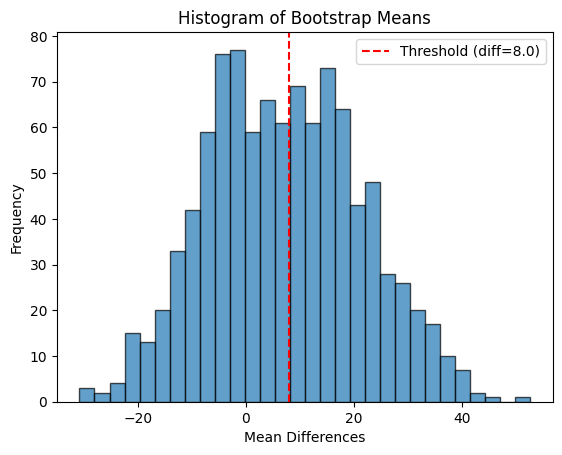

Number of bootstrap means ≥ 8.0: 485
One-tailed p-value: 0.485
Number of bootstrap means ≥ 8.0 or ≤ -8.0: 633
Two-tailed p-value: 0.633


In [ ]:
import numpy as np

# Paired data
v = [80, 30, 75, 90, 57, 72]
nv = [61, 98, 92, 55, 47, 99]

# Step 1: Calculate the differences and the observed mean difference
pairwise_diff = [nv[i] - v[i] for i in range(len(v))]
observed_mean_diff = np.mean(pairwise_diff)
diff = observed_mean_diff

# Step 2: Bootstrap the differences
bootstrap_means = np.empty(1000)
for i in range(1000):
    # Resample the differences with replacement
    resampled_diff = np.random.choice(pairwise_diff, size=len(pairwise_diff), replace=True)
    # Calculate the mean of the resampled differences
    bootstrap_means[i] = np.mean(resampled_diff)

# Step 3: Calculate the p-value
# Find the proportion of bootstrap means greater than or equal to the observed mean difference (one tail)
p_value = np.sum(bootstrap_means >= observed_mean_diff) / 1000

print("Observed Mean Difference:", observed_mean_diff)
print("P-value:", p_value)



import matplotlib.pyplot as plt

# Step 3.1: Draw a histogram of the bootstrap means
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=diff, color='red', linestyle='dashed', linewidth=1.5, label=f'Threshold (diff={diff})')
plt.title('Histogram of Bootstrap Means')
plt.xlabel('Mean Differences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# One-tailed test: Find the number of bootstrap means ≥ diff
num_greater_equal_diff = np.sum(bootstrap_means >= diff)
p_value_one_tailed = num_greater_equal_diff / len(bootstrap_means)

# Two-tailed test: Find the number of bootstrap means ≥ |diff| or ≤ -|diff|
num_extreme = np.sum(bootstrap_means >= diff) + np.sum(bootstrap_means <= -diff)
p_value_two_tailed = num_extreme / len(bootstrap_means)

print(f"Number of bootstrap means ≥ {diff}: {num_greater_equal_diff}")
print(f"One-tailed p-value: {p_value_one_tailed}")
print(f"Number of bootstrap means ≥ {diff} or ≤ -{diff}: {num_extreme}")
print(f"Two-tailed p-value: {p_value_two_tailed}")
